<a href="https://colab.research.google.com/github/OllyMuh/Probability-Statistics/blob/main/Multivariate%20statistical%20analysis.%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

# Задача 1

Даны значения величины заработной платы заёмщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
Возьмём в качестве признака значение salary, а в качестве целевой переменной — scoring.

1. Найдите коэффициенты линейной регрессии, применив формулы для парной регрессии, а затем посредством метода наименьших квадратов.
2. Постройте scatter plot по имеющимся данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
4. Оцените построенное уравнение регрессии по F-критерию Фишера.
5. Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы, воспользовавшись t-статистикой Стьюдента.

In [ ]:
salary1 = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring1 = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832] # целевая переменная
np_salary = np.array(salary1)
np_scoring = np.array(scoring1)

In [ ]:
b1 = (np.mean(np_salary * np_scoring) - np.mean(np_salary) * np.mean(np_scoring)) / (np.mean(np_salary ** 2) - np.mean(np_salary) ** 2)
b1

2.620538882402765

In [ ]:
b0 = np.mean(np_scoring) - b1 * np.mean(np_salary)
b0

444.1773573243596

Итак, модель линейной регрессии имеет вид:

$$y = 444.18 + 2.62 \cdot x,$$

Визуализируем полученные результаты на графике:

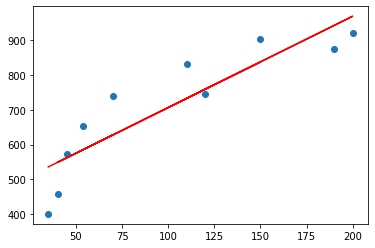

In [ ]:
ox = np_salary
oy = b0 + b1 * ox
plt.scatter(np_salary, np_scoring)
plt.plot(ox, oy, color='red')

In [ ]:
ones = np.ones((np_salary.shape[0], 1))
salary = pd.DataFrame(data = {'salary': salary1})
# salary.shape()
salary = np.hstack((ones, salary))
# salary
scoring = pd.DataFrame(data = {'scoring': scoring1})

In [ ]:
XTX = salary.T.dot(salary)
np.linalg.det(XTX)

# 349464.00000000023

349464.00000000023

Определитель не близок к нулю, поэтому можно записать аналитическое решение:

In [ ]:
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(salary.T).dot(scoring)
print(b)

# результат совпадает с предыдущим

[[444.17735732]
 [  2.62053888]]


Рассчиаем коэффициент детерминации.

В случае парной регрессии значение коэффициента детерминации сводится к корреляции между переменными $x$ и $y$:

$$R^2 = r_{xy}^2.$$


In [ ]:
R2 = np.corrcoef(np_salary, np_scoring) ** 2
# R2 = 0.7876

In [ ]:
# средняя ошибка аппроксимации
def mean_approximation_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()

In [ ]:
# создаем массив предсказанных по модели значений
z1 = b0 + b1 * np_salary

print(f'real: {np_scoring[:5]}')
print(f'pred: {z1[:5]}')

real: [401 574 874 919 459]
pred: [535.89621821 562.10160703 942.07974498 968.2851338  548.99891262]


In [ ]:
mean_approximation_error(np_scoring, z1)
# 0.11469251843561709

0.11469251843561709


Чтобы оценить статистическую значимость уравнения линейной регрессии в целом, используется __F-критерий Фишера__. Соответствующая статистика равна

$$T = \dfrac{R^2}{1 - R^2} \cdot \dfrac{n - k - 1}{k},$$

где $R^2$ — коэффициент детерминации, $n$ — число наблюдений, $k$ — число факторов. В литературе часто используются обозначения $k_1 = k$, $k_2 = n - k - 1$. Иногда вместо $k_1$, $k_2$ пишутся $f_1$, $f_2$.

По таблице (например, по [такой](https://www.chem-astu.ru/science/reference/F-statistic.html)) вычисляется критическое значение $F_{сrit} = F(k_1, k_2)$. Это же значение вычисляется по функции `scipy.stats.f.ppf`.

Если $T > F_{crit}$, то уравнение регрессии признаётся статистически значимым.

In [ ]:
# определем статистику
R2 = 0.78763866
n = salary.shape[0]
k = 2
k1 = k
k2 = n - k - 1

T = (R2 / (1 - R2)) * (k2 / k1)
T

12.981342602189272

In [ ]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

4.73741412777588

Т (12,98) > F (4.74)

следовательно, уравнение регрессии статистически значимо

Найдем доверительный интервал для коэффициента наклона b1

In [ ]:
def standard_error_slope(x, y, z):
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [ ]:
s_slope = standard_error_slope(np_salary, np_scoring, z1)
s_slope

0.48108279568516005

Доверительный интервал для параметра $b_1$:

In [ ]:
t = 2.2281

(b1 - t * s_slope, b1 + t * s_slope)

(1.54863830533666, 3.69243945946887)

Аналогично для параметра $b_0$:

In [ ]:
def standard_error_intercept(x, y, z):
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [ ]:
s_intercept = standard_error_intercept(np_salary, np_scoring, z1)
s_intercept

56.46649755068153

Доверительный интервал для параметра $b_0$:

In [ ]:
(b0 - t * s_intercept, b0 + t * s_intercept)

(318.36435413168607, 569.9903605170331)

# Задача 2

В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а когда — таблица квантилей распределения Стьюдента?

Таблица значений функции Лапласа - для нахождения вероятности того, что случайная величина примет значение, принадлежащее заданному интервалу.

Таблица квантилей распределения Стьюдента - применяется в задачах, связанных с оценкой математического ожидания нормально распределенных случайных величин в условиях, когда объем выборки не велик, а также значимости различия средних двух выборок.